In [3]:
#https://medium.com/@matthew.eiampikul/movie-box-office-correlation-and-linear-regression-model-with-python-1a952df98fef


import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', None)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



df = pd.read_csv('movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


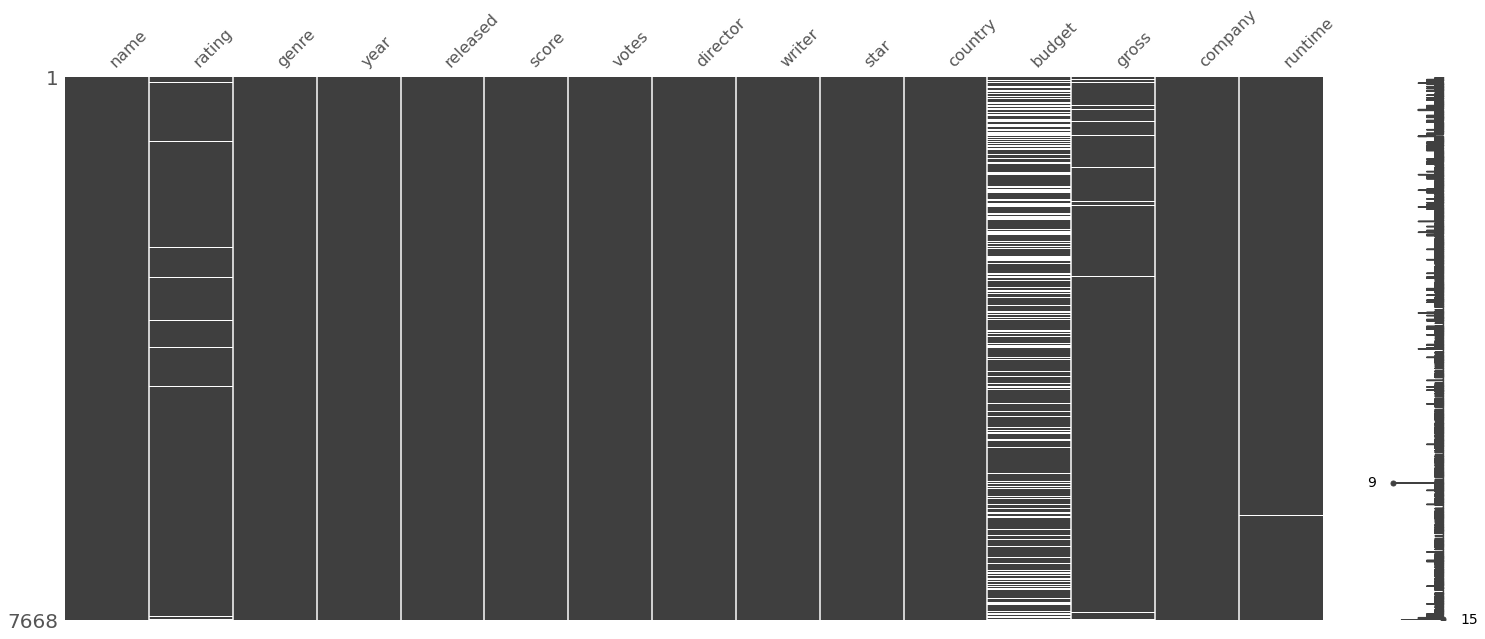

In [6]:
#Observando os missing values:

msno.matrix(df)
plt.show()

In [7]:
missing  = df[df['budget'].isna()]
complete = df[~df['budget'].isna()]

In [8]:
complete.describe()

,year,score,votes,budget,gross,runtime
count,5497.00000,5494.000000,5.494000e+03,5.497000e+03,5.436000e+03,5495.000000
mean,2001.54648,6.385948,1.137758e+05,3.558988e+07,1.030045e+08,108.053685
std,10.62366,0.968827,1.835858e+05,4.145730e+07,1.871051e+08,18.168172
min,1980.00000,1.900000,1.800000e+01,3.000000e+03,3.090000e+02,55.000000
25%,1993.00000,5.800000,1.800000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.00000,6.500000,5.200000e+04,2.050000e+07,3.671199e+07,105.000000
75%,2010.00000,7.000000,1.280000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.00000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [9]:
missing.describe()

,year,score,votes,budget,gross,runtime
count,2171.000000,2171.000000,2.171000e+03,0.0,2.043000e+03,2169.000000
mean,1997.516352,6.401704,2.315393e+04,NaN,1.330069e+07,105.254956
std,11.917771,0.969009,5.481697e+04,NaN,3.935595e+07,19.449220
min,1980.000000,1.900000,7.000000e+00,NaN,6.820000e+02,71.000000
25%,1987.000000,5.800000,2.800000e+03,NaN,9.172055e+05,93.000000
50%,1995.000000,6.500000,8.500000e+03,NaN,3.984669e+06,102.000000
75%,2008.000000,7.100000,2.400000e+04,NaN,1.299659e+07,112.000000
max,2020.000000,8.600000,1.100000e+06,NaN,9.770435e+08,366.000000


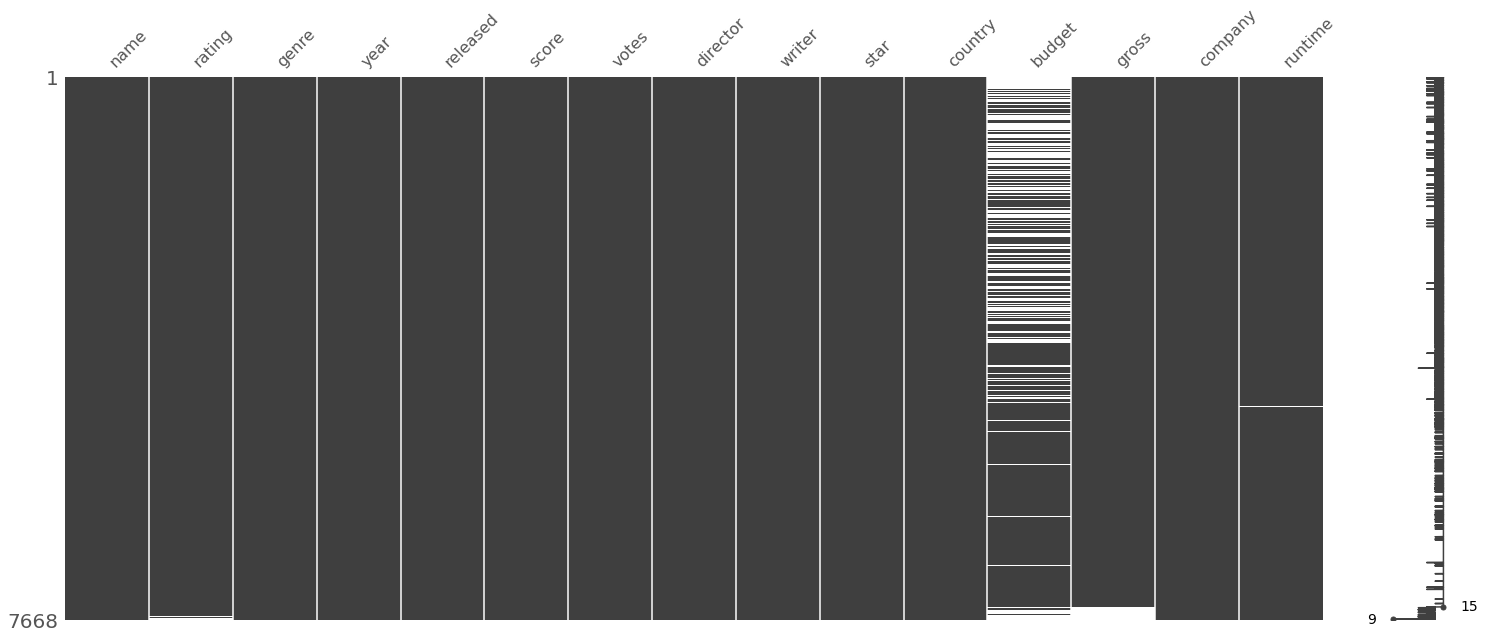

In [10]:
#Orientando os dados pelo gross, missing values do budget tendem a ficar no topo, ou seja quando menor o budget,
#maior a probabilidade de ter missing values

sorted_gross = df.sort_values(by = 'gross')
msno.matrix(sorted_gross)
plt.show()

In [11]:
#Estimar os valores e estimar os missing values com nearest neighbors

from sklearn.impute import KNNImputer

df_imputed = df.copy()

knn_imp = KNNImputer(n_neighbors = 10)

df_imputed[['budget','gross']] = knn_imp.fit_transform(df[['budget','gross']])

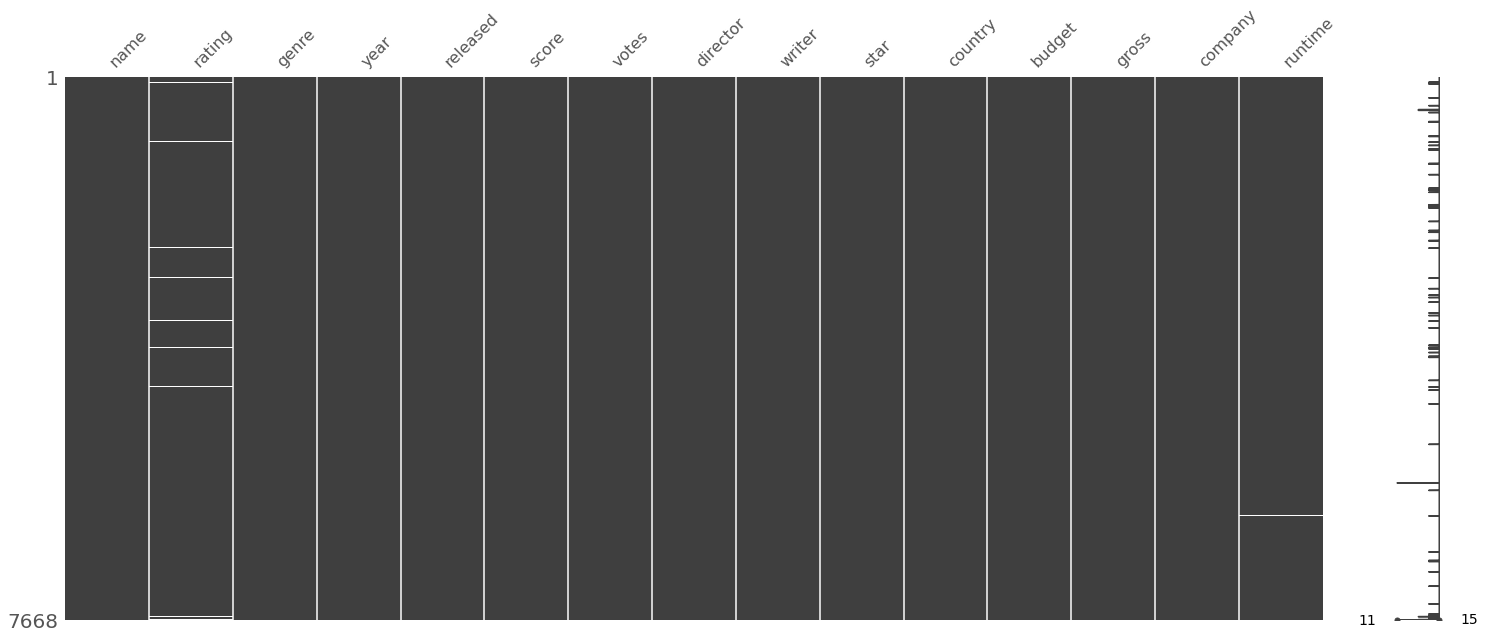

In [12]:
msno.matrix(df_imputed)
plt.show()

In [13]:
df_cleaned = df_imputed.dropna()

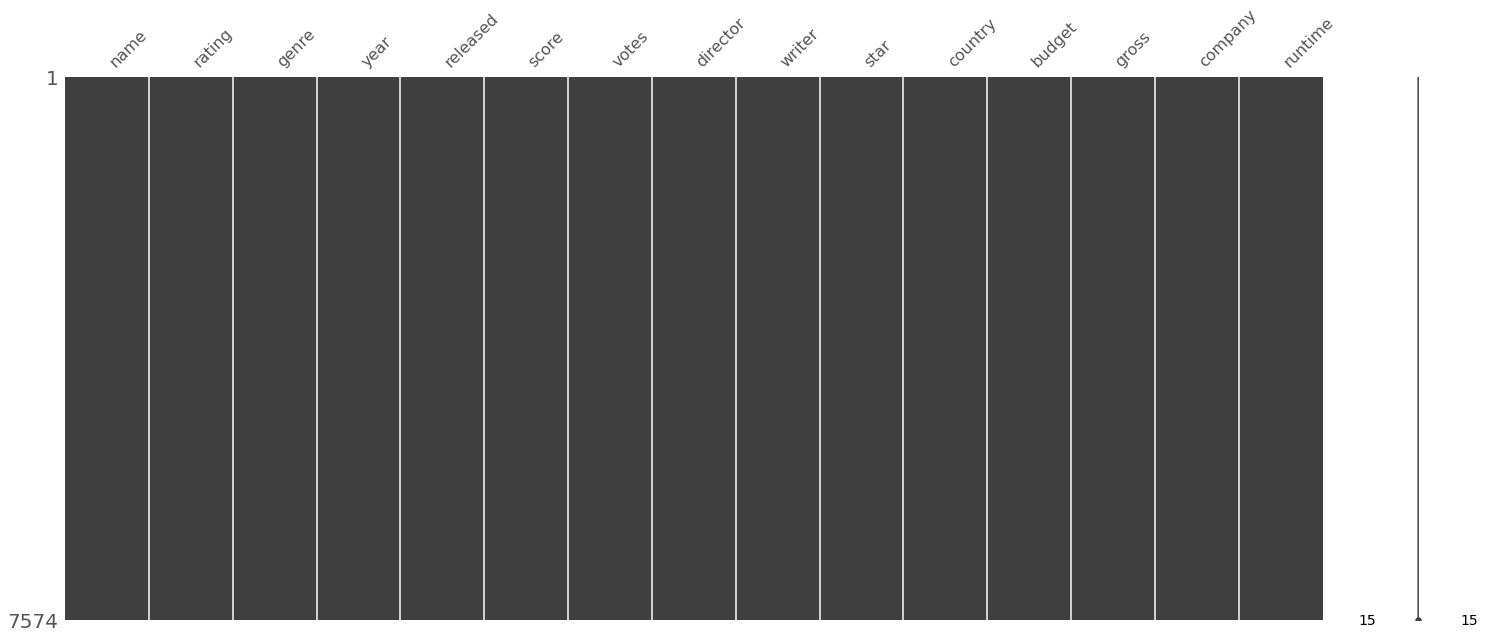

In [14]:
msno.matrix(df_cleaned)
plt.show()

In [15]:
df_cleaned[df_cleaned['gross'] < 0]
df_cleaned[df_cleaned['budget'] < 0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [16]:
#Convertento de float para int

df_cleaned['budget'] = df_cleaned['budget'].astype('int')
df_cleaned['gross'] = df_cleaned['gross'].astype('int')

<ipython-input-16-2e041a16e061>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].astype('int')
<ipython-input-16-2e041a16e061>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gross'] = df_cleaned['gross'].astype('int')


In [17]:
df_cleaned['gross_in_mill'] = df_cleaned['gross']/1000000
df_cleaned['budget_in_mill'] = df_cleaned['budget']/1000000


df_cleaned = df_cleaned.drop(columns = 'budget')
df_cleaned = df_cleaned.drop(columns = 'gross')

<ipython-input-17-02064a4f5e39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gross_in_mill'] = df_cleaned['gross']/1000000
<ipython-input-17-02064a4f5e39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget_in_mill'] = df_cleaned['budget']/1000000


In [18]:
df_country = df_cleaned.groupby(['country']).size().sort_values(ascending = False)

print(pd.DataFrame({'Percentage': df_country/len(df_cleaned)*100}))

                                Percentage
country                                   
United States                    71.903882
United Kingdom                   10.668075
France                            3.498812
Canada                            2.468973
Germany                           1.505149
Australia                         1.201479
Japan                             0.990230
India                             0.805387
Italy                             0.765778
Spain                             0.620544
Ireland                           0.567732
Hong Kong                         0.567732
China                             0.462107
Denmark                           0.409295
South Korea                       0.409295
New Zealand                       0.330077
Sweden                            0.316874
Mexico                            0.277264
Norway                            0.158437
Netherlands                       0.158437
Switzerland                       0.132031
Iran       

<AxesSubplot:xlabel='country', ylabel='count'>

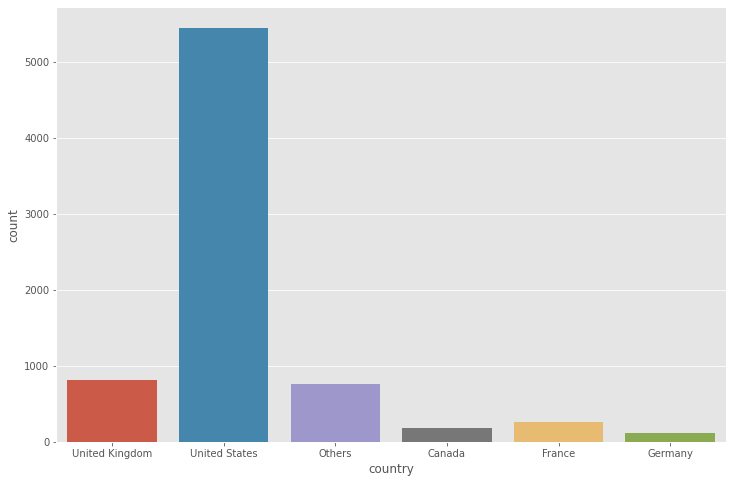

In [19]:
#Agrupar todos os Paises que possuem menos de 100 filmes no grupo 'others'

n = 100
counts = df_cleaned['country'].value_counts()
others = set(counts[counts < n].index)
df_cleaned['country'] = df_cleaned['country'].replace(list(others), 'Others')


sns.countplot(data=df_cleaned, x = 'country')

<AxesSubplot:xlabel='genre', ylabel='count'>

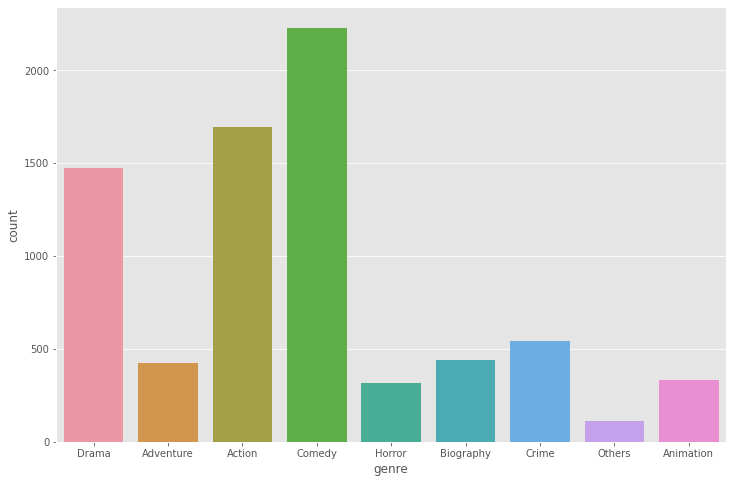

In [20]:
n = 100
counts = df_cleaned['genre'].value_counts()
others = set(counts[counts < n].index)
df_cleaned['genre'] = df_cleaned['genre'].replace(list(others), 'Others')

#Visualize the transformed genre columns

sns.countplot(data=df_cleaned, x ='genre')

<AxesSubplot:title={'center':'Average Budget of Genre in Millions'}, ylabel='Genre'>

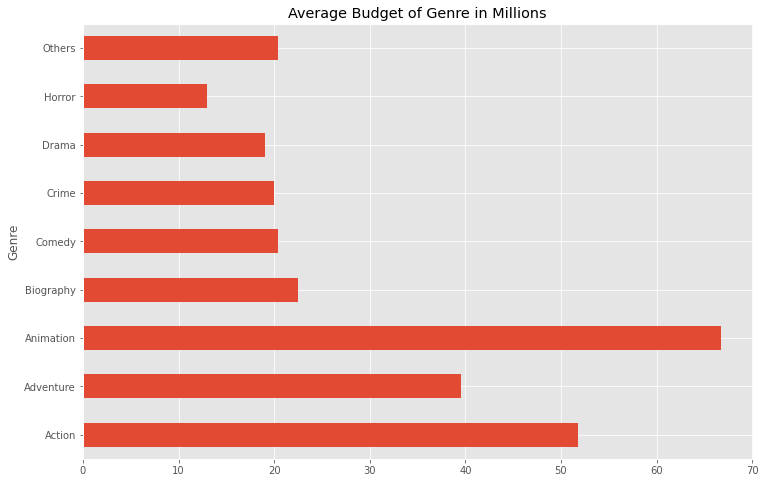

In [21]:
df_cleaned.groupby('genre')['budget_in_mill'].mean().plot(kind = 'barh', xlabel = 'Genre', title = 'Average Budget of Genre in Millions')

In [22]:
print(df_cleaned.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'company', 'runtime',
       'gross_in_mill', 'budget_in_mill'],
      dtype='object')


<AxesSubplot:title={'center':'Retorno do investimento por gênero (%)'}, ylabel='Gênero'>

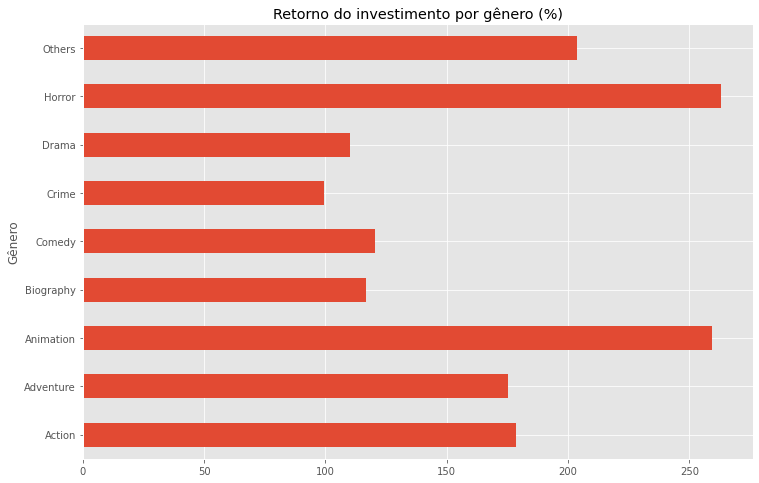

In [23]:
#Qual Genêro teve o melhor retorno do invetimento?

net_profit = df_cleaned.groupby('genre')['gross_in_mill'].mean() - df_cleaned.groupby('genre')['budget_in_mill'].mean()

ROI = (net_profit / df_cleaned.groupby('genre')['budget_in_mill'].mean()) *100


ROI.plot(kind='barh', xlabel = 'Gênero', title='Retorno do investimento por gênero (%)')

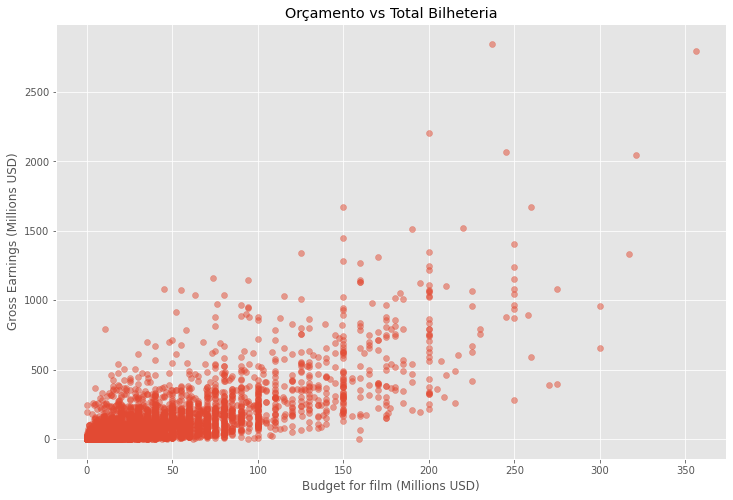

In [24]:
#Correlação entre Budget e Gross:

plt.scatter(x = df_cleaned['budget_in_mill'], y = df_cleaned['gross_in_mill'], alpha = 0.5)
plt.title('Orçamento vs Total Bilheteria')
plt.xlabel('Budget for film (Millions USD)')
plt.ylabel('Gross Earnings (Millions USD)')

plt.show()

Text(0.5, 0, 'Budget for Film (in Millions USD)')

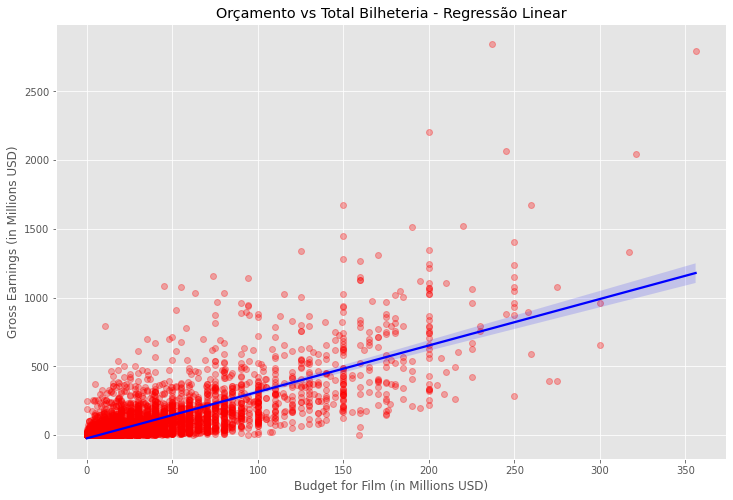

In [25]:
sns.regplot(x = 'budget_in_mill', y = 'gross_in_mill', data = df_cleaned, scatter_kws = {'color': 'red', 'alpha':0.3}, line_kws = {'color':'blue'})

plt.title('Orçamento vs Total Bilheteria - Regressão Linear')
plt.ylabel('Gross Earnings (in Millions USD)')
plt.xlabel('Budget for Film (in Millions USD)')

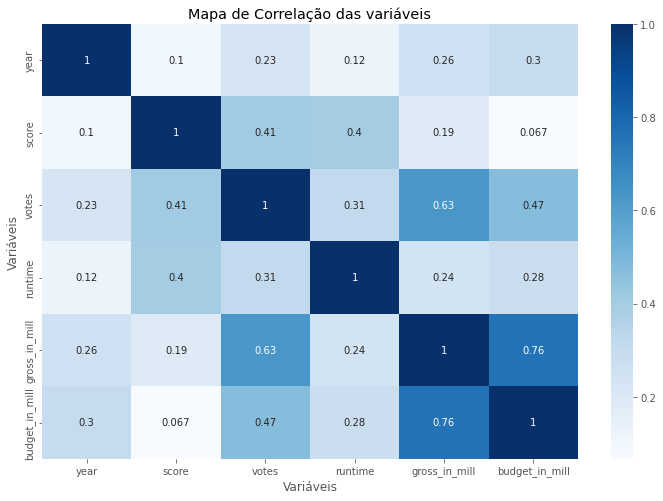

In [26]:
#Fazendo uma matriz de correlação:

correlation_matrix = df_cleaned.corr()

sns.heatmap(correlation_matrix, annot=True, cmap = 'Blues')
plt.title('Mapa de Correlação das variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

A hipótese de que o Orçamento dos filmes estão correlacionados com o seu desempenho na bilheteria está confirmada, pois o valor-r está em 0,76 , o que indica que ambos estão fortemente correlacionados.

Também foi verificado uma alta correlação entre o Orçamento e os votos recebidos

In [34]:
#Verificar se correlação entre Orçamentos vs Votos é estatisticamente significativa

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['budget_in_mill'], df_cleaned['gross_in_mill'])

print('Slope: {}\nIntercept: {}\nr_value: {}\np_value: {}\nstd_err: {}'.format(slope,intercept,r_value,p_value,std_err))

Slope: 3.377361572460393
Intercept: -22.913025632974737
r_value: 0.7575829390460618
p_value: 0.0
std_err: 0.033441178518360336


P-valor é menor que 0,05
A partir das informações, pode-se concluir que Orçamentos vs Votos é significativos entre si

# MODELOS DE REGRESSÂO LINEAR

REGRESSÃO LINEAR SIMPLES:

In [45]:
x = df_cleaned[['budget_in_mill']].values
y = df_cleaned[['gross_in_mill']].values

In [46]:
#Dividir os dados em Test e Train:

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [47]:
#Realizando a regressão no modelo:
from sklearn.linear_model import LinearRegression

mymodel = LinearRegression()
mymodel.fit(x_train,y_train)

LinearRegression()

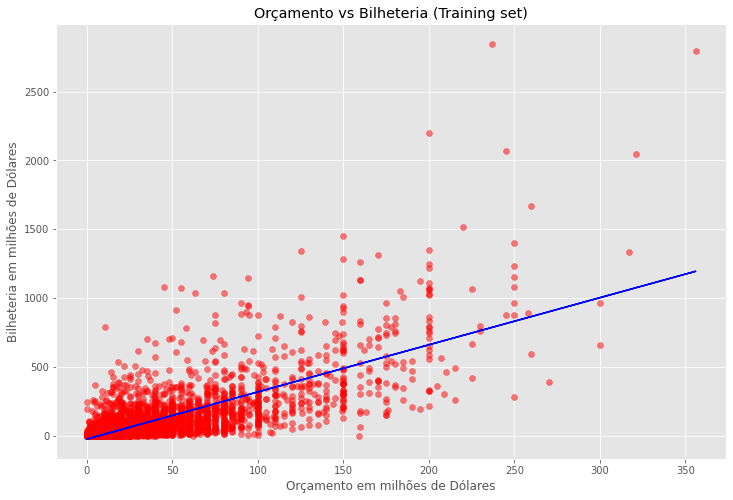

In [53]:
#Usando a regressão do modelo para prever a Bilheteria
y_pred_test_data = mymodel.predict(x_test)

#Visualizado o gráfico train:

plt.scatter(x_train, y_train, color = 'red', alpha = 0.5)
plt.plot(x_train, mymodel.predict(x_train), color = 'blue')
plt.title('Orçamento vs Bilheteria (Training set)')
plt.xlabel('Orçamento em milhões de Dólares')
plt.ylabel('Bilheteria em milhões de Dólares')
plt.show()

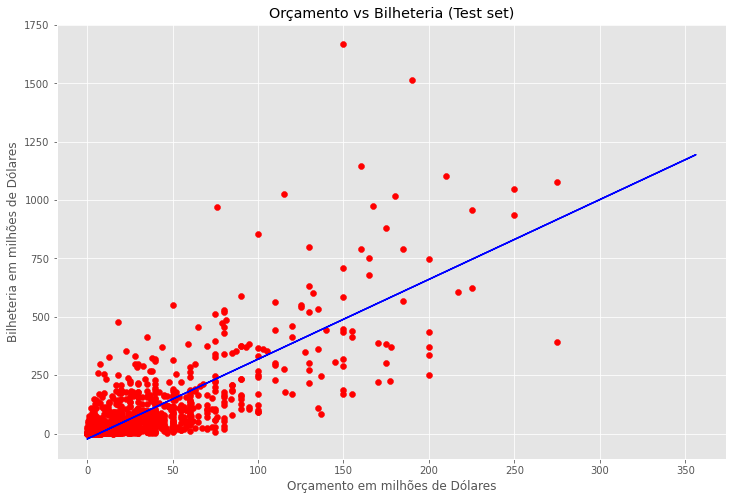

In [54]:
#Visualizando o grafico test:

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, mymodel.predict(x_train), color = 'blue')
plt.title('Orçamento vs Bilheteria (Test set)')
plt.xlabel('Orçamento em milhões de Dólares')
plt.ylabel('Bilheteria em milhões de Dólares')
plt.show()

Text(0.5, 1.0, 'Evaluation Budget vs Gross (Simple Linear Regression Model)')

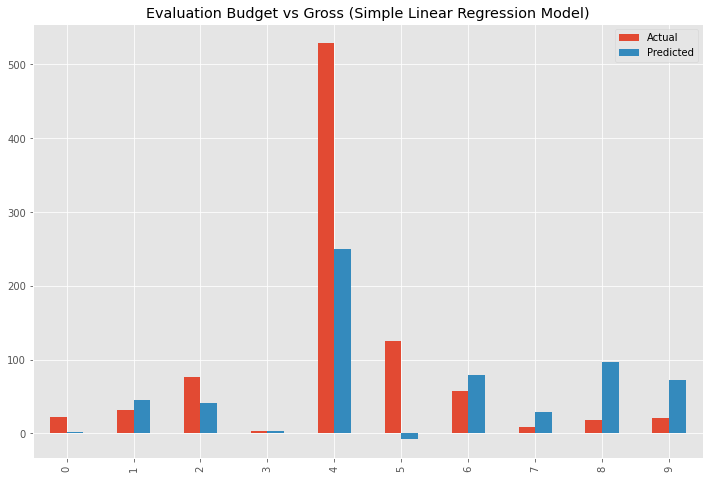

In [55]:
#Avaliando o modelo:

evaluate = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test_data.flatten()})


evaluate.head(10).plot(kind = 'bar')
plt.title('Evaluation Budget vs Gross (Simple Linear Regression Model)')

In [56]:
#Nota do Modelo:
mymodel.score(x_test,y_test)

0.5928743591750141

O modelo de regressão possui uma taxa de confiabilidade de 58.49%

REGRESSÃO LINEAR MÚLTIPLA:

In [59]:
x = df_cleaned[['budget_in_mill', 'votes']]
y = df_cleaned[['gross_in_mill']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


mymodel.fit(x_train, y_train)

LinearRegression()

In [60]:

mymodel.score(x_test, y_test)

0.6789769902316394

Com a regressão linear Múltipla, melhoramos a confiabilidade do modelo para 67,9%